# 🎒 Bagging (Bootstrap Aggregating) en Machine Learning

## 📌 Definición

**Bagging** es una técnica de aprendizaje por **ensembles** (conjunto) cuyo propósito principal es **reducir la varianza** en modelos que tienden al sobreajuste (*overfitting*), como los Árboles de Decisión.

---

## ⚙️ Pasos del Algoritmo

El nombre "Bagging" se deriva de dos componentes clave: **Bootstrap** y **Aggregating**.

### 1. Bootstrap (Muestreo con Reemplazo)

* Se crean $K$ nuevos conjuntos de datos de entrenamiento a partir del original mediante **muestreo con reemplazo**.
* Cada subconjunto tiene el mismo tamaño que el original, pero contiene una mezcla de instancias repetidas y omitidas.

### 2. Entrenamiento y Aggregating (Agregación)

* Se entrena un **modelo base** (ej. un Árbol de Decisión) en cada uno de los $K$ conjuntos de *bootstrap*.
* Las predicciones de estos $K$ modelos se **combinan** para generar una predicción final más robusta:
    * **Clasificación:** Se usa **votación por mayoría** (el resultado más frecuente).
    * **Regresión:** Se usa el **promedio** de las predicciones.

---

## 🌳 Relación Clave con Random Forest

El algoritmo **Random Forest** es una extensión del Bagging que añade una capa extra de aleatoriedad:

| Algoritmo | Aleatoriedad de los Datos | Aleatoriedad de las Características (Features) |
| :--- | :--- | :--- |
| **Bagging** | Sí (Muestreo con reemplazo) | No (Usa todas las características en cada división) |
| **Random Forest** | Sí (Muestreo con reemplazo) | **Sí** (Solo usa un subconjunto aleatorio de *features* en cada división) |

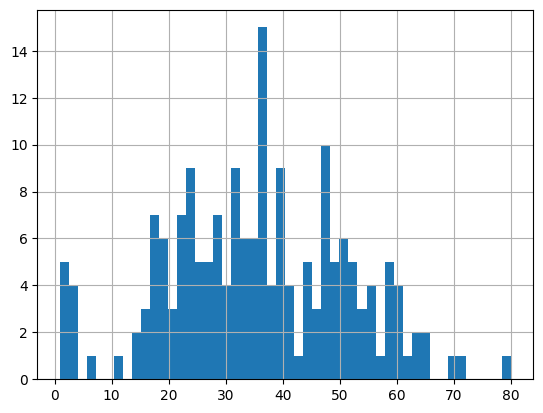

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df = sns.load_dataset('titanic')
df.dropna(inplace=True)

df['pclass'].unique()
df['pclass'].value_counts()

df['sex'].unique()
df['sex'].value_counts()

df['age'].hist(bins=50)

## Data Pre-processing

In [2]:
from sklearn import preprocessing

X = df[['pclass', 'sex', 'age']]

lb = preprocessing.LabelBinarizer()

X['sex'] = lb.fit_transform(X['sex'])
X.head()

C:\Users\PcVIP\AppData\Local\Temp\ipykernel_26304\3874830376.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = lb.fit_transform(X['sex'])


,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [16]:
X.shape

(182, 3)

In [3]:
y = df['survived']
y.value_counts()

survived
1    123
0     59
Name: count, dtype: int64

---

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

# 🚀 Boosting (Impulso de Hipótesis) y AdaBoost

## 🧠 Principio de Boosting

El *Boosting* (Impulso) es una técnica fundamental de *ensemble* que tiene como objetivo crear un **aprendiz fuerte** (*strong learner*) combinando secuencialmente varios **aprendices débiles** (*weak learners*).

* A diferencia del Bagging, los modelos se entrenan **secuencialmente**, donde el rendimiento de cada modelo influye en el entrenamiento del siguiente.
* El algoritmo **aprende de errores pasados**, enfocándose en las instancias que el modelo anterior subajustó (*underfitted*) o clasificó incorrectamente.

---

## ⚡ AdaBoost (Adaptive Boosting)

**AdaBoost** (Adaptive Boosting), introducido por **Robert Schapire** en **1995**, es el algoritmo original de *Boosting*.

### ⚙️ Mecanismo de Funcionamiento Clave

AdaBoost ajusta una secuencia de modelos débiles (como pequeños árboles de decisión) en versiones de los datos que se modifican en cada iteración:

1.  **Pesos Iniciales:** Todas las muestras de entrenamiento comienzan con el mismo peso.
2.  **Aumento de Pesos:** En cada iteración, los **pesos** de las muestras que fueron **clasificadas incorrectamente** por el modelo anterior se **aumentan**.
3.  **Reducción de Pesos:** Los pesos de las muestras **clasificadas correctamente** se **disminuyen**.
4.  **Foco en el Error:** Esto fuerza al siguiente aprendiz débil a concentrarse en las instancias que son "difíciles" y que el *ensemble* anterior no logró clasificar.
5.  **Predicción Final:** Las predicciones de todos los aprendices se combinan mediante un **voto de mayoría ponderado** (o suma), donde los modelos con mejor rendimiento reciben un mayor peso en la decisión final.

* **Implementación:** Comúnmente utilizado como `AdaBoostClassifier` en **Scikit-Learn**.

In [5]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8661

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        36
           1       0.91      0.90      0.91        91

    accuracy                           0.87       127
   macro avg       0.83      0.84      0.84       127
weighted avg       0.87      0.87      0.87       127


Confusion Matrix: 
 [[28  8]
 [ 9 82]]

ROC AUC: 0.8394

Average Accuracy: 	 0.7801
Accuracy SD: 		 0.0841


In [6]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7455

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.76      0.81      0.79        32

    accuracy                           0.75        55
   macro avg       0.74      0.73      0.73        55
weighted avg       0.74      0.75      0.74        55


Confusion Matrix: 
 [[15  8]
 [ 6 26]]

ROC AUC: 0.7323



## AdaBoost con Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.96      0.99      0.97        91

    accuracy                           0.96       127
   macro avg       0.96      0.94      0.95       127
weighted avg       0.96      0.96      0.96       127


Confusion Matrix: 
 [[32  4]
 [ 1 90]]

ROC AUC: 0.9389

Average Accuracy: 	 0.8212
Accuracy SD: 		 0.0893


In [8]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7636

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.79      0.81      0.80        32

    accuracy                           0.76        55
   macro avg       0.76      0.75      0.76        55
weighted avg       0.76      0.76      0.76        55


Confusion Matrix: 
 [[16  7]
 [ 6 26]]

ROC AUC: 0.7541



# 🚀 Gradient Boosting / Máquina de Impulso de Gradiente (GBM)

* Funciona tanto para **regresión** como para **clasificación**.

## 🧠 Conceptos Centrales

* **Añade predictores secuencialmente.**
* **Cada uno corrige a su predecesor.**
* **Ajusta el nuevo predictor a los errores residuales.**

**Comparación con AdaBoost:**
* AdaBoost altera los pesos de las instancias en cada iteración.

---

## 📐 Base Matemática

**Paso 1.** Modelo inicial ($F(x)$) más error ($\epsilon$):
$$Y = F(x) + \epsilon$$

**Paso 2.** Modelamos el error inicial ($\epsilon$) con un nuevo predictor ($G(x)$):
$$\epsilon = G(x) + \epsilon_2$$
Sustituyendo (2) en (1):
$$Y = F(x) + G(x) + \epsilon_2$$

**Paso 3.** Modelamos el error residual ($\epsilon_2$) con otro predictor ($H(x)$):
$$\epsilon_2 = H(x) + \epsilon_3$$
Ahora, el modelo acumulado es:
$$Y = F(x) + G(x) + H(x) + \epsilon_3$$

**Paso Final:** Al añadir ponderación ($\alpha, \beta, \gamma$):
$$Y = \alpha F(x) + \beta G(x) + \gamma H(x) + \epsilon_4$$

---

## 🧱 Elementos del Gradient Boosting

Gradient Boosting implica tres elementos:

1.  **Función de Pérdida (Loss Function) a Optimizar**:
    * La función de pérdida depende del tipo de problema.
    * **Regresión:** Se usa el Error Cuadrático Medio (*Mean Squared Error*).
    * **Clasificación:** Se usa la Pérdida Logarítmica (*Logarithmic Loss*).
    * En *boosting*, en cada etapa se optimiza la pérdida no explicada de las iteraciones anteriores, en lugar de empezar de cero.

2.  **Aprendiz Débil (Weak Learner) para Hacer Predicciones**:
    * Los **Árboles de Decisión** se utilizan como aprendices débiles en *Gradient Boosting*.

3.  **Modelo Aditivo para Añadir Aprendices Débiles y Minimizar la Pérdida**:
    * Los árboles se añaden **uno a la vez**, y los árboles existentes en el modelo **no se modifican**.
    * Se utiliza el procedimiento de **Descenso de Gradiente** (*Gradient Descent*) para minimizar la pérdida al añadir los árboles.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

print_score(gbc_clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.97      0.98      0.97        91

    accuracy                           0.96       127
   macro avg       0.96      0.95      0.95       127
weighted avg       0.96      0.96      0.96       127


Confusion Matrix: 
 [[33  3]
 [ 2 89]]

ROC AUC: 0.9473

Average Accuracy: 	 0.8212
Accuracy SD: 		 0.0893


In [15]:
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7273

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.61      0.65        23
           1       0.74      0.81      0.78        32

    accuracy                           0.73        55
   macro avg       0.72      0.71      0.71        55
weighted avg       0.72      0.73      0.72        55


Confusion Matrix: 
 [[14  9]
 [ 6 26]]

ROC AUC: 0.7106

